In [67]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x = 2*np.random.rand(100,1)

In [21]:
print(x)

[[ 0.29451621]
 [ 1.86310382]
 [ 1.73292033]
 [ 0.84859241]
 [ 0.29531596]
 [ 1.63875019]
 [ 1.45551936]
 [ 1.34431481]
 [ 0.24899798]
 [ 1.87619234]
 [ 0.29507508]
 [ 0.85392806]
 [ 0.78629949]
 [ 1.03357397]
 [ 1.37922228]
 [ 1.60366642]
 [ 1.17573898]
 [ 0.85938604]
 [ 1.10803224]
 [ 0.99467853]
 [ 0.31724123]
 [ 1.11652595]
 [ 0.52144599]
 [ 0.86062719]
 [ 0.92977818]
 [ 0.37802164]
 [ 1.41980603]
 [ 1.9165391 ]
 [ 0.72982973]
 [ 1.4354383 ]
 [ 1.20963136]
 [ 0.08518955]
 [ 1.2447889 ]
 [ 1.56193223]
 [ 0.62422359]
 [ 1.21207151]
 [ 1.28978488]
 [ 1.52141959]
 [ 0.546626  ]
 [ 1.40267309]
 [ 1.14477702]
 [ 0.77345367]
 [ 0.67195643]
 [ 0.28690155]
 [ 1.99796507]
 [ 1.7472228 ]
 [ 1.13093523]
 [ 1.42628411]
 [ 1.80907752]
 [ 1.46205711]
 [ 1.46090698]
 [ 0.34978366]
 [ 1.5726404 ]
 [ 0.72256066]
 [ 1.02446228]
 [ 1.6744336 ]
 [ 1.23410426]
 [ 0.30582153]
 [ 0.1955024 ]
 [ 0.84111829]
 [ 0.94009238]
 [ 1.60003427]
 [ 0.95325976]
 [ 1.71544905]
 [ 0.49586124]
 [ 1.54869023]
 [ 1.41404

In [23]:
y = 4 +3 * x+np.random.randn(100,1)

In [24]:
y

array([[  4.96344243],
       [  8.1319851 ],
       [  9.38840648],
       [  7.49252197],
       [  2.66008794],
       [  9.09221634],
       [  7.74620949],
       [  8.25348411],
       [  6.07813283],
       [  8.41608922],
       [  5.76388335],
       [  8.1376462 ],
       [  7.49231685],
       [  5.4024726 ],
       [  9.33016652],
       [  8.45511257],
       [  8.7910228 ],
       [  6.56833718],
       [  7.70050703],
       [  7.48142275],
       [  4.97440692],
       [  8.22059813],
       [  4.61099816],
       [  7.46437047],
       [  8.30492514],
       [  5.48401287],
       [  8.07616496],
       [  9.51698429],
       [  6.70260477],
       [  7.95416378],
       [  7.5573403 ],
       [  4.29443791],
       [  7.39640192],
       [ 10.20652478],
       [  7.40373522],
       [  9.41340829],
       [  7.90817909],
       [  8.46524407],
       [  8.00273017],
       [  5.10413066],
       [  8.85813693],
       [  7.02428751],
       [  5.86886924],
       [  4

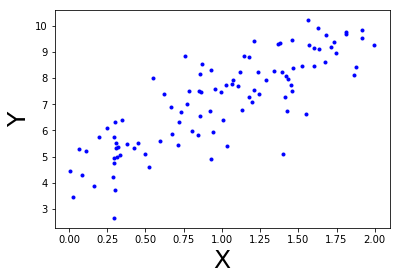

In [31]:

plt.plot(x,y,'b.')
#plt.scatter(x,y)
plt.xlabel("X", fontsize=25)
plt.ylabel("Y",fontsize=25)
plt.show()

In [35]:

X_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 4.47193176]
 [ 2.67786385]]


In [36]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.47193176],
       [ 9.82765946]])

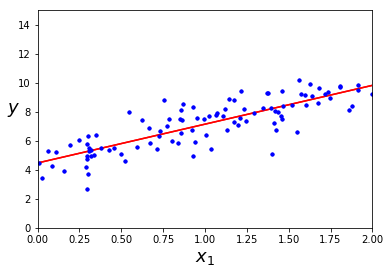

[0, 2, 0, 15]

In [44]:
plt.plot(X_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.show()
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Gradient Descent
Cost Function & Gradients
The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions
Cost $$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$
Gradients $$
\theta_0: = \theta&lt;em&gt;0 -\alpha . (1/m .\sum&lt;/em&gt;{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
$$$$
\theta_1: = \theta&lt;em&gt;1 -\alpha . (1/m .\sum&lt;/em&gt;{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
$$$$
\theta_2: = \theta&lt;em&gt;2 -\alpha . (1/m .\sum&lt;/em&gt;{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
$$

In [47]:
def cost_func(theta,x,y):
    m = len(y)
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [62]:
def gradient_descent(x,y,theta,lr=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(x,theta)
        
        theta = theta -(1/m)*lr*( x.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cost_func(theta,x,y)
        
    return theta, cost_history, theta_history

In [53]:
lr =0.01
n_iter = 1000

In [63]:
theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.171,
Theta1:          2.942
Final cost/MSE:  4726.379


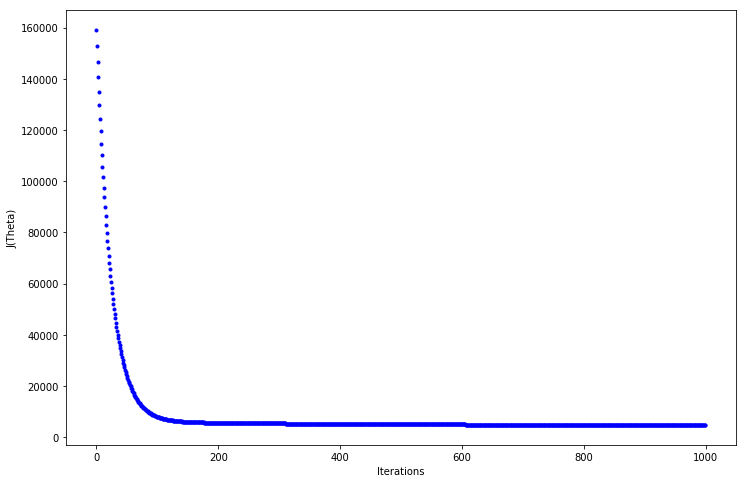

In [68]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

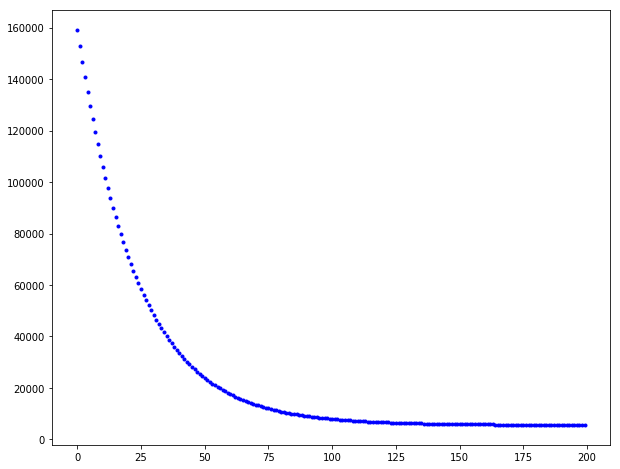

In [70]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [73]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(x,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(x,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

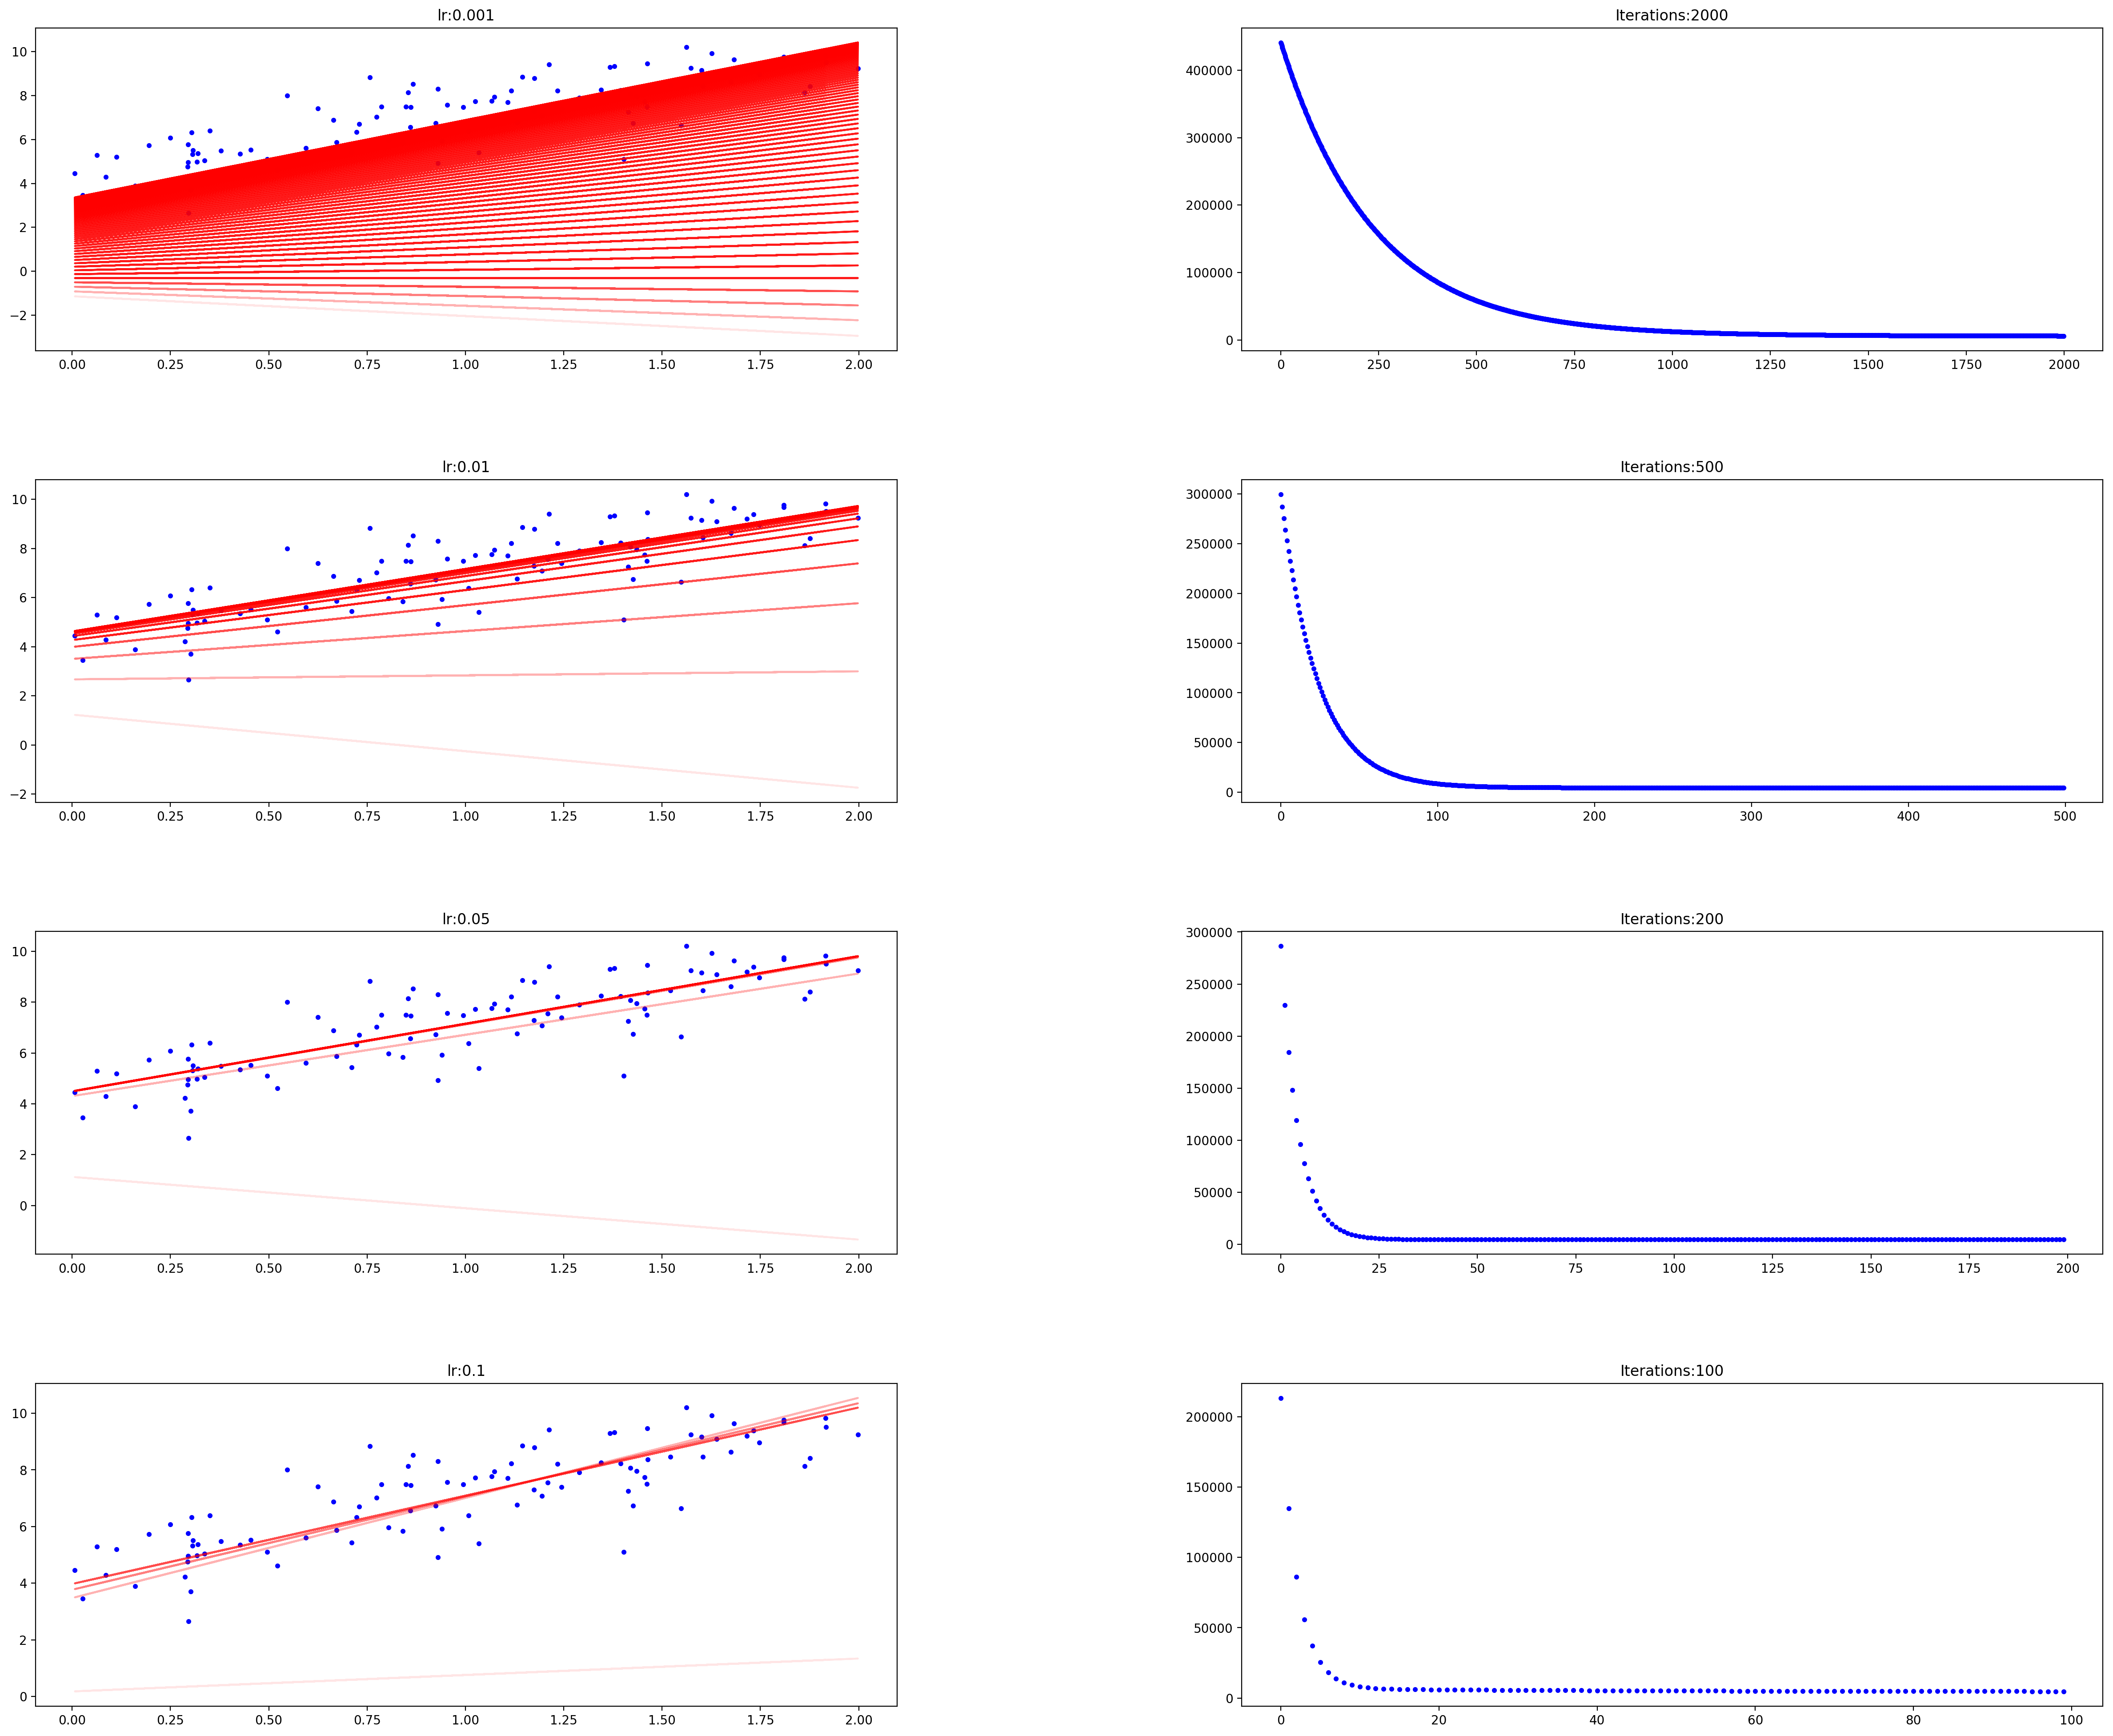

In [74]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [ ]:

_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)